In [1]:
%matplotlib inline
from sklearn.cluster import KMeans
import re
import sqlite3
import nltk
import string
from nltk.corpus import stopwords
stop = stopwords.words("english")
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
english_stemmer=nltk.stem.SnowballStemmer('english')
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from math import floor,ceil
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression

In [2]:
k_means_data = pd.read_csv('./CSVs/train_data_5.csv')

In [3]:
def cleaning(excerpt, remove_stopwords=True):
    excerpt_text = re.sub("[^a-zA-Z]"," ", excerpt)
    words = excerpt_text.lower().split()
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    b=[]
    stemmer = english_stemmer 
    for word in words:
        b.append(stemmer.stem(word))
    return(b)

In [4]:
clean_Text = []
for excerpt in k_means_data['text']:
    clean_Text.append( " ".join(cleaning(excerpt)))

In [5]:
k_means_data['text'] = clean_Text

In [6]:
Top_Words =pd.Series(' '.join(clean_Text).lower().split()).value_counts()[:10]
print ("Top Count Words Used In Review", Top_Words)

Top Count Words Used In Review market      9770
committe    8158
feder       7574
rate        7515
inflat      6854
econom      6003
price       5876
reserv      5147
polici      5048
increas     4782
dtype: int64


In [7]:
k_means_data

,Unnamed: 0,sasdate,UNRATE,CPIAUCSL,INDPRO,S&P 500,FEDFUNDS,unemployment_rate,text,negative_sentiment,UNRATE-1,UNRATE-3,UNRATE-6,FEDFUNDS-1,FEDFUNDS-3,FEDFUNDS-6,FEDFUNDS-10,future_rate,past_rate
0,10,8.624448e+08,4.9,159.900,79.7730,833.09,5.50,4.9,frb fomc minut may minut feder open market com...,0.040,5.2,5.4,5.1,5.39,5.29,5.22,5.56,4.7,5.6
1,11,8.677152e+08,4.9,160.400,80.7798,925.29,5.52,4.9,frb fomc minut juli minut feder open market co...,0.032,4.9,5.2,5.2,5.50,5.19,5.30,5.31,4.6,5.5
2,12,8.703936e+08,4.8,160.800,81.6119,927.24,5.54,4.8,frb fomc minut august minut feder open market ...,0.036,4.9,5.2,5.4,5.52,5.39,5.31,5.24,4.7,5.6
3,13,8.730720e+08,4.9,161.200,82.4022,937.02,5.54,4.9,frb fomc minut septemb minut feder open market...,0.037,4.8,4.9,5.4,5.54,5.50,5.29,5.40,4.4,5.5
4,14,8.783424e+08,4.6,161.700,83.7534,938.92,5.52,4.6,frb fomc minut novemb minut feder open market ...,0.038,4.9,4.9,5.2,5.54,5.52,5.19,5.22,4.5,5.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,167,1.514765e+09,4.0,248.721,101.3561,2789.80,1.41,4.0,fed monetari polici skip main contentback home...,0.035,4.1,4.3,4.4,1.30,1.15,0.91,0.41,3.7,4.7
158,168,1.519862e+09,4.0,249.517,102.2980,2702.77,1.51,4.0,fed monetari polici skip main contentback home...,0.043,4.0,4.2,4.3,1.41,1.16,1.04,0.54,3.8,4.7
159,169,1.525133e+09,3.8,250.786,102.5408,2701.49,1.70,3.8,fed monetari polici skip main contentback home...,0.041,4.0,4.1,4.3,1.51,1.30,1.15,0.66,3.9,4.6
160,170,1.527811e+09,4.0,251.152,103.3045,2754.35,1.82,4.0,fed monetari polici skip main contentback home...,0.041,3.8,4.0,4.3,1.70,1.41,1.15,0.79,4.0,4.4


In [8]:
def fit_corpus(train_final):
    corpus = pd.DataFrame({"text": train_final["text"]})
    print(corpus)
    tfidf = TfidfVectorizer(max_features=1000, ngram_range=(1,3))
    tfidf.fit(corpus["text"])
    return tfidf

def transform_data(tfidf, dataset):
    features = tfidf.transform(dataset["text"])
    return pd.DataFrame(features.todense(), columns = tfidf.get_feature_names())

In [9]:
tfidf = fit_corpus(k_means_data)
features = transform_data(tfidf, k_means_data) 

                                                  text
0    frb fomc minut may minut feder open market com...
1    frb fomc minut juli minut feder open market co...
2    frb fomc minut august minut feder open market ...
3    frb fomc minut septemb minut feder open market...
4    frb fomc minut novemb minut feder open market ...
..                                                 ...
157  fed monetari polici skip main contentback home...
158  fed monetari polici skip main contentback home...
159  fed monetari polici skip main contentback home...
160  fed monetari polici skip main contentback home...
161  fed monetari polici skip main contentback home...

[162 rows x 1 columns]


/home/nat/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [10]:
features

,abroad,acceler,accommod,accord,account,across,act,action,activ,addit,...,widen,widespread,william,worker,would,would continu,would like,year,yield,york
0,0.000000,0.043551,0.000000,0.019001,0.038001,0.000000,0.000000,0.025334,0.082336,0.000000,...,0.008488,0.009492,0.000000,0.013552,0.088670,0.000000,0.000000,0.095003,0.000000,0.019001
1,0.006832,0.015134,0.006339,0.033013,0.038515,0.000000,0.024737,0.033013,0.066026,0.000000,...,0.000000,0.016491,0.000000,0.011773,0.121048,0.015232,0.000000,0.154061,0.000000,0.016506
2,0.000000,0.045308,0.007591,0.026356,0.032946,0.007782,0.009875,0.013178,0.092248,0.013506,...,0.000000,0.009875,0.000000,0.014099,0.092248,0.000000,0.000000,0.092248,0.000000,0.032946
3,0.008280,0.000000,0.007683,0.040011,0.020006,0.007876,0.000000,0.026674,0.073354,0.027337,...,0.008937,0.019987,0.000000,0.042807,0.080022,0.009231,0.000000,0.093360,0.007047,0.020006
4,0.000000,0.018617,0.000000,0.027074,0.027074,0.007994,0.020287,0.047380,0.047380,0.020810,...,0.009071,0.010144,0.000000,0.028966,0.108296,0.009369,0.010282,0.101528,0.021459,0.013537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.011743,0.000000,0.032687,0.015132,0.068092,0.006702,0.014173,0.015132,0.037829,0.011631,...,0.005070,0.000000,0.017475,0.010118,0.075658,0.005236,0.008620,0.058635,0.029983,0.011349
158,0.010696,0.000000,0.043006,0.002871,0.017228,0.003391,0.004303,0.014357,0.043071,0.011771,...,0.023089,0.000000,0.013265,0.018432,0.109113,0.000000,0.047979,0.045942,0.051586,0.008614
159,0.006638,0.000000,0.033873,0.002673,0.018710,0.015784,0.004006,0.013364,0.037419,0.019175,...,0.014328,0.000000,0.012347,0.008579,0.096221,0.003700,0.020301,0.064147,0.053668,0.002673
160,0.007481,0.000000,0.027764,0.006025,0.018074,0.003558,0.009029,0.012049,0.054221,0.018523,...,0.016148,0.000000,0.018554,0.016114,0.066270,0.000000,0.013727,0.081332,0.041384,0.009037


In [11]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(features)
    distortions.append(kmeanModel.inertia_)

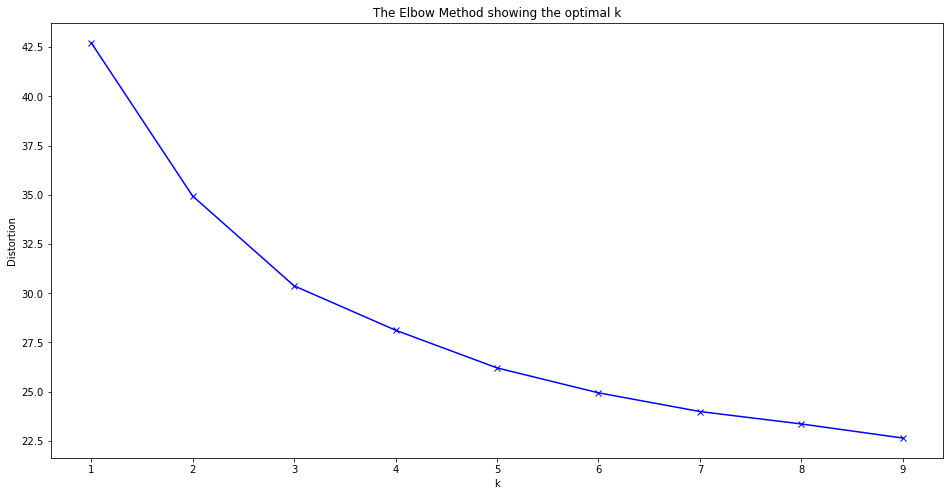

In [12]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [13]:
kmeans = KMeans(n_clusters=3).fit(features)
centroids = kmeans.cluster_centers_
print(centroids)



[[0.00824908 0.0198514  0.01976386 ... 0.11279181 0.01663233 0.01740989]
 [0.00742451 0.00400548 0.03557282 ... 0.07945248 0.03354802 0.01216382]
 [0.00924089 0.00600432 0.01822973 ... 0.06812578 0.01425376 0.05451199]]


In [14]:
labels = kmeans.labels_
k_means_data['sent_group'] = labels

In [15]:
y_train = k_means_data['future_rate']

In [16]:
k_means_data = k_means_data.drop(['future_rate','UNRATE','text', 'Unnamed: 0'], axis=1)

In [17]:
k_means_data

,sasdate,CPIAUCSL,INDPRO,S&P 500,FEDFUNDS,unemployment_rate,negative_sentiment,UNRATE-1,UNRATE-3,UNRATE-6,FEDFUNDS-1,FEDFUNDS-3,FEDFUNDS-6,FEDFUNDS-10,past_rate,sent_group
0,8.624448e+08,159.900,79.7730,833.09,5.50,4.9,0.040,5.2,5.4,5.1,5.39,5.29,5.22,5.56,5.6,0
1,8.677152e+08,160.400,80.7798,925.29,5.52,4.9,0.032,4.9,5.2,5.2,5.50,5.19,5.30,5.31,5.5,0
2,8.703936e+08,160.800,81.6119,927.24,5.54,4.8,0.036,4.9,5.2,5.4,5.52,5.39,5.31,5.24,5.6,0
3,8.730720e+08,161.200,82.4022,937.02,5.54,4.9,0.037,4.8,4.9,5.4,5.54,5.50,5.29,5.40,5.5,0
4,8.783424e+08,161.700,83.7534,938.92,5.52,4.6,0.038,4.9,4.9,5.2,5.54,5.52,5.19,5.22,5.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,1.514765e+09,248.721,101.3561,2789.80,1.41,4.0,0.035,4.1,4.3,4.4,1.30,1.15,0.91,0.41,4.7,2
158,1.519862e+09,249.517,102.2980,2702.77,1.51,4.0,0.043,4.0,4.2,4.3,1.41,1.16,1.04,0.54,4.7,1
159,1.525133e+09,250.786,102.5408,2701.49,1.70,3.8,0.041,4.0,4.1,4.3,1.51,1.30,1.15,0.66,4.6,1
160,1.527811e+09,251.152,103.3045,2754.35,1.82,4.0,0.041,3.8,4.0,4.3,1.70,1.41,1.15,0.79,4.4,1


In [18]:
LR_2 = LinearRegression()
LR_2.fit(k_means_data,y_train)

LinearRegression()

In [19]:
test_2 = LR_2.predict(k_means_data)
score_2=r2_score(y_train,test_2)
print("r2 score is",score_2)
print("mean_sqrd_error is==",mean_squared_error(y_train,test_2))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(y_train,test_2)))

r2 score is 0.9625480913144925
mean_sqrd_error is== 0.11626007754752786
root_mean_squared error of is== 0.34096932053709444


In [20]:
LR_2.coef_

array([-1.04029386e-08,  9.59626747e-02, -5.41867673e-03, -1.00645213e-03,
       -4.74102036e-01,  8.54691110e-01, -2.16748026e-02,  9.15843346e-02,
       -3.52088307e-01,  2.56784671e-01,  1.62759367e-01,  2.91784895e-01,
       -1.19278272e-01,  2.28132936e-01, -2.18637080e-01,  8.09996020e-02])

In [21]:
freg=f_regression(k_means_data,y_train)

p=freg[1]

print(p)

[6.40969921e-02 1.01234071e-02 8.44051778e-03 1.66912015e-08
 8.54137988e-13 1.26595120e-64 6.08938442e-07 3.74608267e-54
 2.26127764e-38 2.78340457e-23 3.74574649e-11 4.28375380e-08
 1.91535767e-04 1.39546052e-01 4.25799941e-11 4.65064202e-04]
